## Part 0 - ConvNet


In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# reshaping

train_images = train_images.astype("float32") / 255 
test_images = test_images.astype("float32") / 255
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
# layers
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [ ]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [ ]:
network.add(layers.Flatten())
network.add(layers.Dense(64))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# Training and evaluation

network.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics = "accuracy")
history = network.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.0458 - accuracy: 0.9860
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0170 - accuracy: 0.9950


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0329 - accuracy: 0.9911
test_acc: 0.991100013256073


In [ ]:
h = history.history
print(h.keys())

dict_keys(['loss', 'accuracy'])


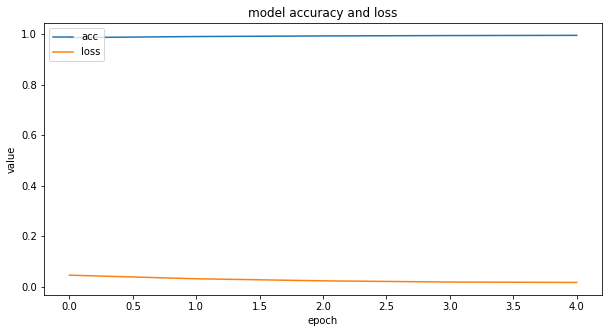

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()